In [ ]:

from google.colab import files
f = files.upload()

Saving 서울교통공사_지하철혼잡도정보_20241231.csv to 서울교통공사_지하철혼잡도정보_20241231.csv


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 19 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,200 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 124926 files and dire

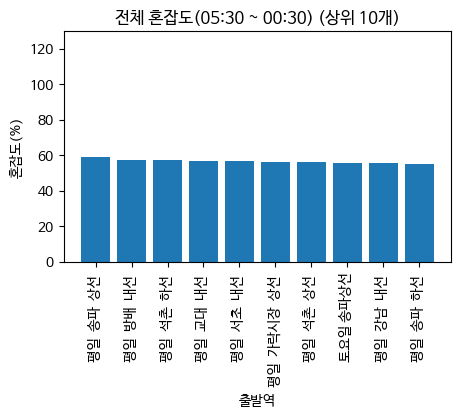

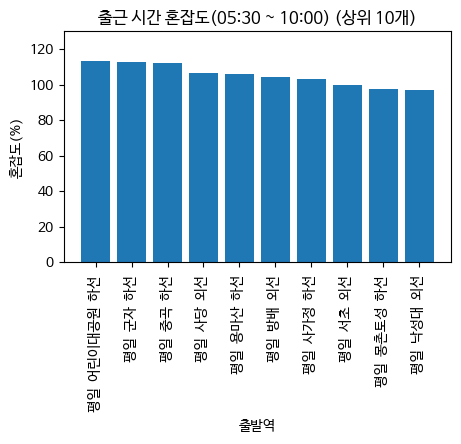

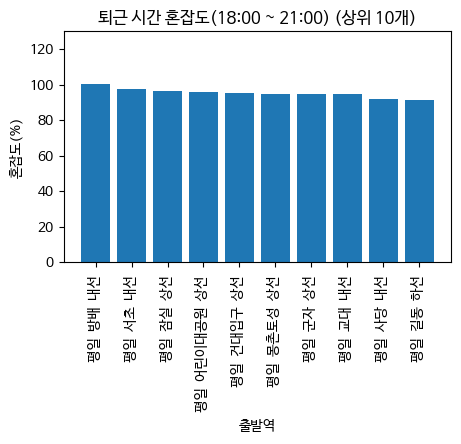

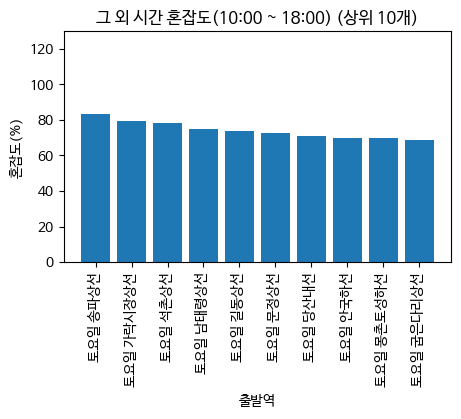

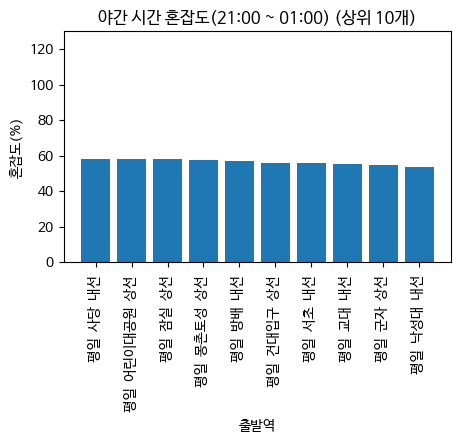

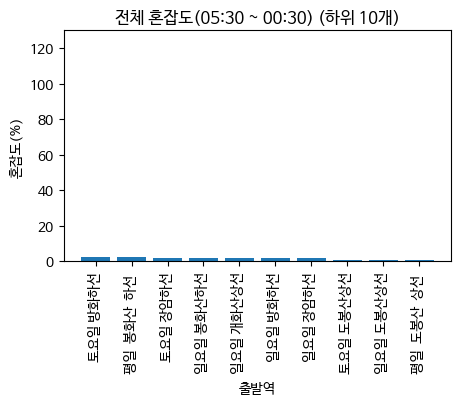

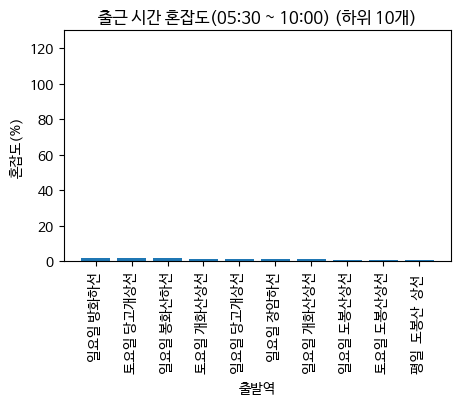

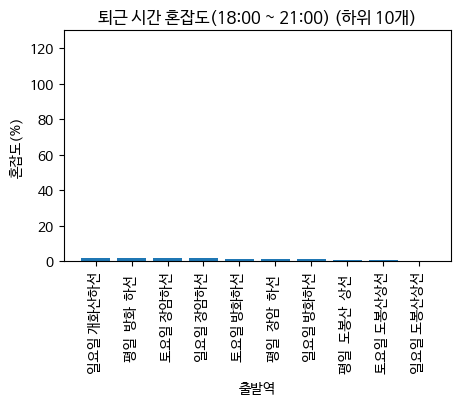

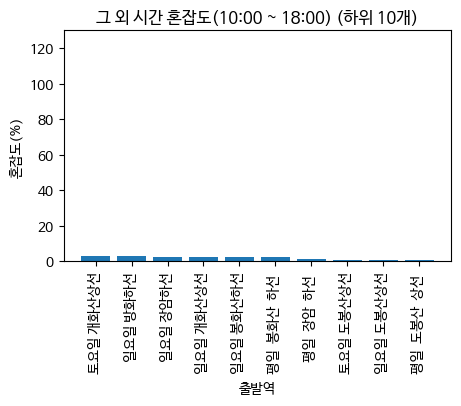

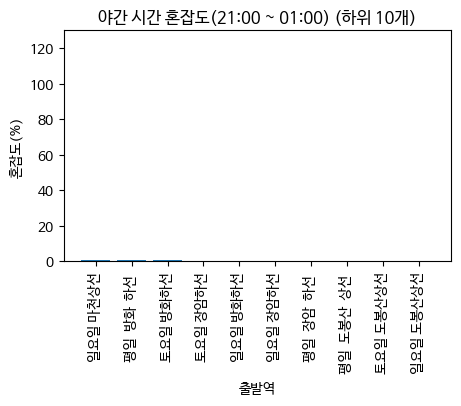

In [19]:
import matplotlib.pyplot as plt
from matplotlib import rc
# 한글 폰트 설정
rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 처리


import pandas as pd
import numpy as np



df = pd.read_csv('서울교통공사_지하철혼잡도정보_20241231.csv', encoding = 'cp949')

#data casting to list
data = []
dataCongestion = []
dataCongestionAverage = []
dataCongestionMorningRushAverage = []#출근 시간 혼잡도 평균
dataCongestionAfternoonAverage = []#그 외 시간 혼잡도 평균
dataCongestionEveningRushAverage = []#퇴근 시간 혼잡도 평균
dataCongestionNightAverage = []# 야간 시간  혼잡도 평균
listResult = []

#data average
for i in range(0, len(df)):

    df['00시30분'] = df['00시30분'].fillna(0)
    data.append(list(df.iloc[i]))
    dataCongestion.append(list(df.iloc[i][6 : 45]))
    listResult.append([df.iloc[i, 1]] +
            [df.iloc[i, 4]] +
            [df.iloc[i, 5]] +
            [np.average(dataCongestion[i])] +
            [np.average(dataCongestion[i][0 : 9])] +
            [np.average(dataCongestion[i][9 : 25])] +
            [np.average(dataCongestion[i][25 : 31])] +
            [np.average(dataCongestion[i][31 : ])])



column_names = ['요일구분', '출발역', '상하구분', '혼잡도 전체평균', '혼잡도 출근시간 평균', '혼잡도 그 외 시간 평균', '혼잡도 퇴근시간 평균', '혼잡도 야간시간 평균']
dfResult = pd.DataFrame(listResult, columns = column_names)


dfResult['요일출발역'] = dfResult['요일구분'] + dfResult['출발역'] + dfResult['상하구분']
dfResult.drop(['요일구분', '출발역', '상하구분'], axis=1, inplace=True)

#sort dataframe
def metroSort(congestionName):
    dfResult.sort_values(by = [congestionName], ascending = False, inplace = True)
    dfTop10 = dfResult[dfResult[congestionName] != 0].head(10)
    dfTop10
    dfBottom10 = dfResult[dfResult[congestionName] != 0].tail(10)
    dfBottom10
    return dfTop10, dfBottom10

dfTotalTop10, dfTotalBottom10 = metroSort('혼잡도 전체평균')
dfMorningTop10, dfMorningBottom10 = metroSort('혼잡도 출근시간 평균')
dfAfternoonTop10, dfAfternoonBottom10 = metroSort('혼잡도 그 외 시간 평균')
dfEveningRushTop10, dfEveningRushBottom10 = metroSort('혼잡도 퇴근시간 평균')
dfNightTop10, dfNightBottom10 = metroSort('혼잡도 야간시간 평균')


def CongestionGraph(somethingDf, congestionName, timeStr):
    plt.figure(figsize=(5, 3))
    plt.bar(somethingDf['요일출발역'], somethingDf[congestionName])
    plt.xticks(rotation=90)
    plt.xlabel('출발역')
    plt.ylabel('혼잡도(%)')
    plt.title(timeStr)
    plt.ylim(0, 130)
    plt.show()

#print graph
CongestionGraph(dfTotalTop10, '혼잡도 전체평균', '전체 혼잡도(05:30 ~ 00:30) (상위 10개)')
CongestionGraph(dfMorningTop10, '혼잡도 출근시간 평균','출근 시간 혼잡도(05:30 ~ 10:00) (상위 10개)')
CongestionGraph(dfEveningRushTop10, '혼잡도 퇴근시간 평균','퇴근 시간 혼잡도(18:00 ~ 21:00) (상위 10개)')
CongestionGraph(dfAfternoonTop10, '혼잡도 그 외 시간 평균','그 외 시간 혼잡도(10:00 ~ 18:00) (상위 10개)')
CongestionGraph(dfNightTop10, '혼잡도 야간시간 평균','야간 시간 혼잡도(21:00 ~ 01:00) (상위 10개)')

CongestionGraph(dfTotalBottom10, '혼잡도 전체평균', '전체 혼잡도(05:30 ~ 00:30) (하위 10개)')
CongestionGraph(dfMorningBottom10, '혼잡도 출근시간 평균','출근 시간 혼잡도(05:30 ~ 10:00) (하위 10개)')
CongestionGraph(dfEveningRushBottom10, '혼잡도 퇴근시간 평균','퇴근 시간 혼잡도(18:00 ~ 21:00) (하위 10개)')
CongestionGraph(dfAfternoonBottom10, '혼잡도 그 외 시간 평균','그 외 시간 혼잡도(10:00 ~ 18:00) (하위 10개)')
CongestionGraph(dfNightBottom10, '혼잡도 야간시간 평균','야간 시간 혼잡도(21:00 ~ 01:00) (하위 10개)')
